# Signatures Features Visualization using Deep Convolutional Autoencoder 

## Signatures Property Value Extraction from WikiData

In [1]:
import bz2
import json
import pandas as pd

In [2]:
def filter_wikidata_with_signatures(json_bz2_file, test_num_line_condition=False, 
                                    num_lines_to_read=10, print_json=False, 
                                    spacing_between_json=5, 
                                    verbose=False):
    """
    
    Filter the wikidata objects which have the signature property 'P109'.
    
    Parameters:
    -----------
    
    json_bz2_file: (string) Path to wikidata JSON file which is zipped in bz2 format.
    
    test_num_line_condition: (bool) Whether to test the condition for num_lines_to_read.
    
    num_lines_to_read: (integer) The number of lines to read from json_bz2_file. 
                       It includes lines which contain and do not contain the P109 property.
                       
    print_json: (bool) Print the JSON which contains the 'P109' property.
    
    spacing_between_json: (integer) The number of new lines to print between successing JSONs 
                          when print_json is True.
                          
    verbose: (bool) Whether to print the 'index of signature', id, name, and 'signature property value' 
             as and when they are filtered.
    
    Returns:
    --------
    
    Pandas DataFrame containing the object id, name and 'signature property value'.
    
    """
    if num_lines_to_read <= 0:
        return
    df = pd.DataFrame()
    wikidata = bz2.BZ2File(json_bz2_file, "r")    
    count = 0
    signature_count = 0
    for line in wikidata:
        if line.startswith("{") and (line.endswith("},\n") or line.endswith("}\n")):
            count += 1
            if "P109" in line:
                if line.endswith("},\n"):
                    line = line[:-2]
                elif line.endswith("}\n"):
                    line = line[:-1]            
                j = json.loads(line)                 
                try:
                    id = j['id']
                    name = j['labels']['en']['value']
                    signature = str(j['claims']['P109'][0]['mainsnak']['datavalue']['value'])   
                    signature_count += 1
                    if verbose:
                        print signature_count, id, name, signature
                    df = df.append([[id, name, signature]])
                except:
                    if test_num_line_condition:                        
                        if count == num_lines_to_read:
                            break
                    continue
                if print_json:
                    print json.dumps(j, sort_keys=True, indent=8, separators=(',', ':'))
                    print "\n" * spacing_between_json
        if test_num_line_condition:            
            if count == num_lines_to_read:
                break
    wikidata.close()
    df.columns = ['id', 'name', 'signature']
    return df

In [ ]:
signatures_df = filter_wikidata_with_signatures("./data/wikidata-20161212-all.json.bz2")

In [ ]:
signatures_df.to_csv("./data/signatures.csv", index=False, encoding='utf-8')

In [3]:
signatures_df = pd.read_csv("./data/signatures.csv")
signatures_df

,id,name,signature
0,Q23,George Washington,George Washington signature.svg
1,Q207,George W. Bush,GeorgeWBush Signature.png
2,Q326,Eduardo Frei Ruiz-Tagle,Firma Frei Ruiz-Tagle.png
3,Q368,Augusto Pinochet,Signature of Augusto Pinochet.svg
4,Q475,Eduardo Frei Montalva,Firma Frei Montalva.svg
5,Q501,Charles Baudelaire,Baudelaire signatur .svg
6,Q815,Gabriel Gonzáles Videla,Firma G. Gonzalez Videla.jpg
7,Q873,Meryl Streep,Meryl Streep Signature.svg
8,Q905,Franz Kafka,Franz Kafka's signature.svg
9,Q909,Jorge Luis Borges.,Jorge Luis Borges firma.svg


## Signature Filenames URL Extraction from WikiData using the Signature Property Values

In [4]:
from urllib import urlopen
from bs4 import BeautifulSoup as bs
import pickle

In [6]:
def extract_signature_url_from_wikidata(signatures_df, verbose=False):
    """
    
    Extract the URLs of the signature files of people.
    
    Parameters:
    -----------
    
    signatures_df: (Pandas Dataframe) columns - id, name, and 'signature property value' 
    
    verbose: (bool) If verbose is True, it prints the 'count of signature' and 'url of signature' 
             as and when they are found. 
             
             
    Returns:
    --------
    
    List of the URLs of the signatures in the order of rows in the signatures_df.
    
    
    """

    count = 0
    signature_url_list = []
    for row in xrange(signatures_df.shape[0]):
        count += 1
        id = signatures_df.iloc[row, 0]
        signature = signatures_df.iloc[row, 2]
        try:
            html = urlopen("https://www.wikidata.org/wiki/" + id)
            bsobj = BeautifulSoup(html.read(), "html")
            links = bsobj.findAll("a", {"class": "extiw"}, href=True)
            for link in links:
                link_content = link.get_text()
                if link_content == signature:
                    link_href = "https:" + link['href']
                    title = link_href[link_href.find("File:") + 5:]                
                    html2 = urlopen(link_href)
                    bsobj2 = BeautifulSoup(html2.read(), "html")
                    links2 = bsobj2.findAll("a", {"class": "internal"}, href=True)
                    link2 = links2[0]
                    signature_url = link2['href']
                    if verbose:
                        print count, signature_url
                    signature_url_list.append(signature_url)                             
                    break
        except BaseException as e:
            print id, signature, e
            
    if count == len(signature_url_list):
        print "Successfully found all file URLs"
    else:
        print "Failure in finding all file URLs"
            
    return signature_url_list
        

In [74]:
signature_url_list = extract_signature_url_from_wikidata(signatures_df, verbose=True)

1 https://upload.wikimedia.org/wikipedia/commons/2/2e/George_Washington_signature.svg
2 https://upload.wikimedia.org/wikipedia/commons/f/fd/GeorgeWBush_Signature.png
3 https://upload.wikimedia.org/wikipedia/commons/5/59/Firma_Frei_Ruiz-Tagle.png
4 https://upload.wikimedia.org/wikipedia/commons/8/8e/Signature_of_Augusto_Pinochet.svg
5 https://upload.wikimedia.org/wikipedia/commons/8/83/Firma_Frei_Montalva.svg
6 https://upload.wikimedia.org/wikipedia/commons/5/53/Baudelaire_signatur_.svg
7 https://upload.wikimedia.org/wikipedia/commons/1/14/Firma_G._Gonzalez_Videla.jpg
8 https://upload.wikimedia.org/wikipedia/commons/6/68/Meryl_Streep_Signature.svg
9 https://upload.wikimedia.org/wikipedia/commons/1/1f/Franz_Kafka%27s_signature.svg
10 https://upload.wikimedia.org/wikipedia/commons/b/b5/Jorge_Luis_Borges_firma.svg
11 https://upload.wikimedia.org/wikipedia/commons/8/8e/Roald_Amundsen_signature.jpg
12 https://upload.wikimedia.org/wikipedia/commons/d/d7/Albert_Einstein_signature_1934.svg
13 h

It is evident that due to network failure 6 links failed to be recorded. So, let's process these missing links manually.

In [81]:
temp_id = ["Q1936526", "Q1960369", "Q1964821", "Q2896509", "Q3570142", "Q5069656"]
temp_signature = ["Rasmus Malling-Hansen signature.jpg", 
                  "Handtekening Vincent van Gogh (1789-1874).jpg", 
                  "Karel VI. Schwarzenberg - podpis.gif", 
                  "Signature feroumont.png", 
                  "Wu Tao.jpg", 
                  "Amayak Kobulov Signature 1939.png"]
temp_name = ["", "", "", "", "", ""]
temp_df = pd.DataFrame()
temp_df['id'] = pd.Series(temp_id)
temp_df['name'] = pd.Series(temp_name)
temp_df['signature'] = pd.Series(temp_signature)
temp_df

,id,name,signature
0,Q1936526,,Rasmus Malling-Hansen signature.jpg
1,Q1960369,,Handtekening Vincent van Gogh (1789-1874).jpg
2,Q1964821,,Karel VI. Schwarzenberg - podpis.gif
3,Q2896509,,Signature feroumont.png
4,Q3570142,,Wu Tao.jpg
5,Q5069656,,Amayak Kobulov Signature 1939.png


In [82]:
temp_signature_url_list = extract_signature_url_from_wikidata(temp_df, verbose=True)

1 https://upload.wikimedia.org/wikipedia/commons/b/b8/Rasmus_Malling-Hansen_signature.jpg
2 https://upload.wikimedia.org/wikipedia/commons/3/3b/Handtekening_Vincent_van_Gogh_%281789-1874%29.jpg
3 https://upload.wikimedia.org/wikipedia/commons/d/d9/Karel_VI._Schwarzenberg_-_podpis.gif
4 https://upload.wikimedia.org/wikipedia/commons/d/d1/Signature_feroumont.png
5 https://upload.wikimedia.org/wikipedia/commons/2/21/Wu_Tao.jpg
6 https://upload.wikimedia.org/wikipedia/commons/d/df/Amayak_Kobulov_Signature_1939.png
Successfully found all file URLs


In [92]:
for i in xrange(len(temp_id)):
    index = signatures_df.loc[signatures_df['id'] == temp_id[i]].index[0]
    print index
    signature_url_list.insert(index, temp_signature_url_list[i])

1151
1152
1153
1250
1359
1462


In [94]:
with open("./data/signatures_url_list.pkl", "wb") as p:
    pickle.dump(signature_url_list, p)

In [7]:
with open("./data/signatures_url_list.pkl", "rb") as p:
    signature_url_list = pickle.load(p)

In [8]:
signature_url_list[:5]

['https://upload.wikimedia.org/wikipedia/commons/2/2e/George_Washington_signature.svg',
 'https://upload.wikimedia.org/wikipedia/commons/f/fd/GeorgeWBush_Signature.png',
 'https://upload.wikimedia.org/wikipedia/commons/5/59/Firma_Frei_Ruiz-Tagle.png',
 'https://upload.wikimedia.org/wikipedia/commons/8/8e/Signature_of_Augusto_Pinochet.svg',
 'https://upload.wikimedia.org/wikipedia/commons/8/83/Firma_Frei_Montalva.svg']

In [9]:
len(signature_url_list)

7223

In [98]:
del temp_df, temp_id, temp_name, temp_signature, temp_signature_url_list

## Download Images of Signatures from the found URLs

In [10]:
from urllib import urlretrieve
import os

In [13]:
def download_signatures(original_path_dir, signature_url_list, verbose=False):
    """
    
    Download images of signatures from the list of URLs provided.
    
    Parameters:
    -----------
    
    original_path_dir: (string) path of directory where the files 
                       are to be stored after downloading
                       
    signature_url_list: (list) list of urls of signatures which
                        are to be downloaded
                        
    verbose: (bool) whether to print download updates
    
    Returns:
    --------
    
    retvalue: (integer) 0 if success and 1 if failure
    
    urls_failed_to_download: (list) list of urls which failed due 
                             to some error possibly network connectivity problem
    
    """
    count = 0
    urls_failed_to_download = []    
    for url in signature_url_list:
        count += 1
        filename = url.split("/")[-1]
        path = original_path_dir + os.path.sep + filename
        try:
            if verbose:
                print "Downloading (%d) -> %s" % (count, url)
            urlretrieve(url, filename=path)
        except BaseException as e:
            urls_failed_to_download.append(url)
            print count, url, e
    
    retvalue = 0
    if count == signatures_df.shape[0]:
        print "Successfully downloaded all images of signature"
    else:
        print "Failure to download all images of signatures"
        retvalue = 1
       
    return retvalue, urls_failed_to_download

In [14]:
original_path_dir = "./data/signatures_images/original/"
retvalue, urls_failed_to_download = download_signatures(original_path_dir, 
                                                        signature_url_list,
                                                        verbose=True)

Successfully downloaded all images of signature


After downloading the images of signatures, I observed that some signatures had text other than signature, contained seals, stamps, photos of face, etc. So, such images were rejected by manually going through all the images. 

In [33]:
accepted_path_dir = "./data/signatures_images/accepted/"
accepted_signature_filenames = os.listdir(accepted_path_dir)

In [34]:
len(accepted_signature_filenames)

6370

I have accepted 6370 images from 7223 images.

## Preprocessing Images of Signatures

In [29]:
from scipy import misc
import subprocess as sp
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import math

In [30]:
%matplotlib inline

In [37]:
def preprocess_signatures(original_path_dir, save_path_dir=None, visualize=False, num_signatures_to_visualize=10):
    """
    
    Preprocess the signatures by converting all images to .png, and applying Otsu Thresholding 
    followed by Morphological Opening.
    
    Parameters:
    -----------
    
    original_path_dir: (string) path of directory containing original wikidata downloaded signatures
    
    save_path_dir: (string) path of directory where preprocessed signature images should be stored
    
    visualize: (bool) whether to visualize the output as subplots of original and preprocessed signatures
    
    num_signatures_to_visualize: (integer) if visualize is True, then how many images should be visualised
    
    """
    files = os.listdir(original_path_dir)
    visualize_counter = 0
    count = 0
    for f in files:
        count += 1
        if not f.endswith(".png"):
            f2 = os.path.splitext(f)[0] + ".png"
            p = original_path_dir + f
            p2 = original_path_dir + f2
            sp.call(["convert", p, p2])
            sp.call(["rm", p])
            p = p2
        else:
            f2 = f
            p = original_path_dir + f
        
        img = misc.imread(p, mode="L")
        print "Preprocessing (%d) -> %s" % (count, p)
        ret, img_binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        img_opening = cv2.morphologyEx(img_binary, cv2.MORPH_OPEN, (3, 3))
        
        if save_path_dir is not None:
            p3 = save_path_dir + os.path.sep + f2
            misc.imsave(p3, img_opening)
        
        if visualize:
            if visualize_counter < num_signatures_to_visualize:
                plt.subplot(1, 2, 1)
                plt.imshow(img, cmap="gray")
                plt.axis("off")
                plt.title("Original")
                plt.subplot(1, 2, 2)
                plt.imshow(img_opening, cmap="gray")
                plt.axis('off')
                plt.title("Preprocessed")
                plt.suptitle(os.path.splitext(f)[0])
                plt.show()
                visualize_counter += 1

In [38]:
accepted_path_dir = "./data/signatures_images/accepted/"
preprocessed_path_dir = "./data/signatures_images/preprocessed/"
preprocess_signatures(accepted_path_dir, 
                      save_path_dir=preprocessed_path_dir)

Preprocessing (1) -> ./data/signatures_images/accepted/Handtekening_Nicolaas_Beets.png
Preprocessing (2) -> ./data/signatures_images/accepted/George_Wythe_signature.png
Preprocessing (3) -> ./data/signatures_images/accepted/Ihor_Miroshnychenko_Signature_2014.png
Preprocessing (4) -> ./data/signatures_images/accepted/Signature_of_Edward_Fenech_Adami.png
Preprocessing (5) -> ./data/signatures_images/accepted/KallioKyostiSignature.png
Preprocessing (6) -> ./data/signatures_images/accepted/Firma_de_Jose_Joaquin_Garcia_de_Torres.png
Preprocessing (7) -> ./data/signatures_images/accepted/Caravaggio_autograph.png
Preprocessing (8) -> ./data/signatures_images/accepted/Jacques_Cartier_Signature.png
Preprocessing (9) -> ./data/signatures_images/accepted/Firma_Pablo_de_Olavide.png
Preprocessing (10) -> ./data/signatures_images/accepted/Henry_B._Lovering_signature.png
Preprocessing (11) -> ./data/signatures_images/accepted/Appletons%27_Anthony_Henry_Bowen_signature.png
Preprocessing (12) -> ./data

/usr/lib/python2.7/dist-packages/PIL/Image.py:870: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


Preprocessing (267) -> ./data/signatures_images/accepted/Frank_H._Hurd_signature.png
Preprocessing (268) -> ./data/signatures_images/accepted/Sampayo-firma.png
Preprocessing (269) -> ./data/signatures_images/accepted/Joseph_F._Smith_signature.png
Preprocessing (270) -> ./data/signatures_images/accepted/Pavel_Eisner%2C_podpis.png
Preprocessing (271) -> ./data/signatures_images/accepted/Werner_Molders_Signature.png
Preprocessing (272) -> ./data/signatures_images/accepted/T._G._Masaryk_Signature.png
Preprocessing (273) -> ./data/signatures_images/accepted/Benjamin_Spock_signature.png
Preprocessing (274) -> ./data/signatures_images/accepted/Appletons%27_Davidson_Lucretia_Maria_signature.png
Preprocessing (275) -> ./data/signatures_images/accepted/Signature_of_Rianti_Cartwright.png
Preprocessing (276) -> ./data/signatures_images/accepted/Benjamin_Franklin_Signature.png
Preprocessing (277) -> ./data/signatures_images/accepted/Sannie_Overly_signature.png
Preprocessing (278) -> ./data/signatur

Some of the preprocessed images are very dirty and the signature cannot be seen clearly. I'm going to manually delete such signatures.

In [44]:
preprocessed_path_dir = "./data/signatures_images/preprocessed/"
len(os.listdir(preprocessed_path_dir))

5879

After first stage of image preprocessing and manual rejection of unclean images, I'm left with 5879 images.

In [47]:
def resize_preprocessed_images(preprocessed_path_dir, visualize=False):
    """
    
    Resize all images to the size of the image with the maximum size. It replaces the 
    original preprocessed images with the new resized ones.
    
    Parameters:
    -----------
    
    preprocessed_path_dir: (string) path to the directory containing preprocessed images
    
    visualize: (bool) whether to show final preprocessed images while processing
    
    """
    
    files = os.listdir(preprocessed_path_dir)
    max_width = 0
    max_height = 0
    
    for f in files:
        p = preprocessed_path_dir + f
        old_img = misc.imread(p, mode="L")
        width = old_img.shape[1]
        height = old_img.shape[0]
        if width > max_width:
            max_width = width
        if height > max_height:
            max_height = height
            
    print "Max Height: %d, Max Width: %d" % (max_height, max_width)
    
    count = 0
    for f in files:
        count += 1
        p = preprocessed_path_dir + f
        print "Preprocessing [resizing] (%d) -> %s" % (count, p)
        old_img = misc.imread(p, mode="L")
        width = old_img.shape[1]
        height = old_img.shape[0]
        new_img = np.ones(shape=(max_height, max_width), dtype=old_img.dtype) * 255
        scale_height, scale_width = math.floor(1.0 * max_height / height), math.floor(1.0 * max_width / width) 
        height_to_width_ratio = height * 1.0 / width
        new_width = int(width * min(scale_width, scale_height))
        new_height = int(height_to_width_ratio * new_width)
        scaled_img = cv2.resize(old_img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
        new_img[:new_height, :new_width] = scaled_img
        misc.imsave(p, new_img)
        
        if visualize:
            plt.imshow(new_img, cmap="gray")
            plt.xticks([])
            plt.yticks([])
            plt.show()

In [48]:
resize_preprocessed_images(preprocessed_path_dir)

Max Height: 4800, Max Width: 11781
Preprocessing [resizing] (1) -> ./data/signatures_images/preprocessed/Michael_Shonrock_signature.png
Preprocessing [resizing] (2) -> ./data/signatures_images/preprocessed/Rufus_king_signature.png
Preprocessing [resizing] (3) -> ./data/signatures_images/preprocessed/Gertrude_Stein-_Autograph.png
Preprocessing [resizing] (4) -> ./data/signatures_images/preprocessed/Handtekening_Nicolaas_Beets.png
Preprocessing [resizing] (5) -> ./data/signatures_images/preprocessed/George_Wythe_signature.png
Preprocessing [resizing] (6) -> ./data/signatures_images/preprocessed/Signature_Zamacois.png
Preprocessing [resizing] (7) -> ./data/signatures_images/preprocessed/Signature_of_Richard_Neville%2C_Earl_of_Warwick.png
Preprocessing [resizing] (8) -> ./data/signatures_images/preprocessed/Anna_Escobedo_Cabral_sig.png
Preprocessing [resizing] (9) -> ./data/signatures_images/preprocessed/Radovan_Karadzic_Signature.png
Preprocessing [resizing] (10) -> ./data/signatures_imag

In [49]:
list_of_final_preprocessed_images = os.listdir(preprocessed_path_dir)

In [51]:
with open("./data/list_of_final_preprocessed_images.pkl", "wb") as f:
    pickle.dump(list_of_final_preprocessed_images, f)

In [73]:
with open("./data/list_of_final_preprocessed_images.pkl", "rb") as f:
    list_of_final_preprocessed_images = pickle.load(f)

print list_of_final_preprocessed_images[:5]

['Michael_Shonrock_signature.png', 'Rufus_king_signature.png', 'Gertrude_Stein-_Autograph.png', 'Handtekening_Nicolaas_Beets.png', 'George_Wythe_signature.png']


(4800, 11781)


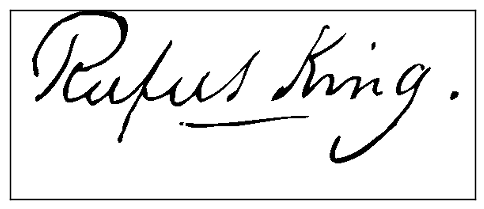

In [65]:
path = preprocessed_path_dir + list_of_final_preprocessed_images[1]
img1 = misc.imread(path, mode="L")
print img1.shape
plt.imshow(img1, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

Since the so far preprocessed images are too big in shape i.e. (4800, 11781), so I am going to resize them to a height of 100.

In [66]:
height_to_width_ratio = img1.shape[0] * 1.0 / img1.shape[1]
height_to_width_ratio

0.40743570155334863

In [67]:
new_height = 100
new_width = int(math.floor(new_height * 1.0 / height_to_width_ratio))
print new_height, new_width

100 245


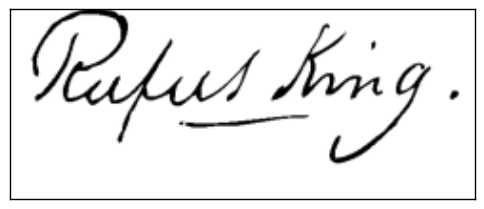

In [68]:
img2 = cv2.resize(img1, (new_width, new_height), interpolation=cv2.INTER_AREA)
plt.imshow(img2, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

In [69]:
print "Resizing all images to (%d, %d)" % (new_height, new_width)

Resizing all images to (100, 245)


In [72]:
count = 0
for f in list_of_final_preprocessed_images:
    count += 1
    path = preprocessed_path_dir + f
    img1 = misc.imread(path, mode="L")
    print "Resizing (%d) -> %s" % (count, path)
    img2 = cv2.resize(img1, (new_width, new_height), interpolation=cv2.INTER_AREA)
    misc.imsave(path, img2)

Resizing (1) -> ./data/signatures_images/preprocessed/Michael_Shonrock_signature.png
Resizing (2) -> ./data/signatures_images/preprocessed/Rufus_king_signature.png
Resizing (3) -> ./data/signatures_images/preprocessed/Gertrude_Stein-_Autograph.png
Resizing (4) -> ./data/signatures_images/preprocessed/Handtekening_Nicolaas_Beets.png
Resizing (5) -> ./data/signatures_images/preprocessed/George_Wythe_signature.png
Resizing (6) -> ./data/signatures_images/preprocessed/Signature_Zamacois.png
Resizing (7) -> ./data/signatures_images/preprocessed/Signature_of_Richard_Neville%2C_Earl_of_Warwick.png
Resizing (8) -> ./data/signatures_images/preprocessed/Anna_Escobedo_Cabral_sig.png
Resizing (9) -> ./data/signatures_images/preprocessed/Radovan_Karadzic_Signature.png
Resizing (10) -> ./data/signatures_images/preprocessed/Handtekening_Isaac_Antoni_van_Roijen_%281859-1938%29.png
Resizing (11) -> ./data/signatures_images/preprocessed/Gagarin_Signature.png
Resizing (12) -> ./data/signatures_images/pre

## Preparing Train and Test Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import misc
from sklearn.model_selection import train_test_split

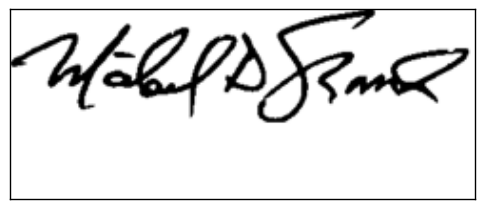

100 245


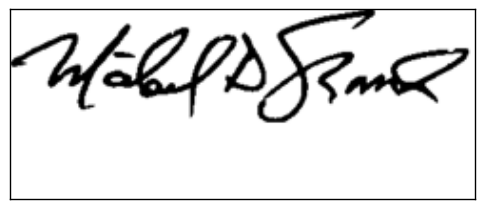

In [2]:
preprocessed_path_dir = "./data/signatures_images/preprocessed/"
list_of_final_preprocessed_images = os.listdir(preprocessed_path_dir)
path = preprocessed_path_dir + list_of_final_preprocessed_images[0]
img = misc.imread(path, mode="L") / 255.0
img_height = img.shape[0]
img_width = img.shape[1]
plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()
print img_height, img_width
img2 = img.flatten()
img2 = img2.reshape((img_height, img_width))
plt.imshow(img2, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

In [3]:
num_images = len(list_of_final_preprocessed_images)
num_features = img_height * img_width
print num_images, num_features

5879 24500


In [4]:
data = np.zeros((num_images, num_features))

In [5]:
count = 0
for i in xrange(num_images):
    count += 1
    path = preprocessed_path_dir + list_of_final_preprocessed_images[i]
    img = misc.imread(path, mode="L")
    data[i, :] = img.flatten()

In [6]:
temp_y = np.zeros((num_images, 1))
x_train, x_test, _, _ = train_test_split(data, temp_y, test_size=0.2, random_state=42)
del temp_y

In [7]:
x_train.shape

(4703, 24500)

In [8]:
x_test.shape

(1176, 24500)

## Deep Convolutional Autoencoder Model

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Input, Convolution2D, MaxPooling2D, \
                         UpSampling2D, Flatten, Reshape, advanced_activations
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping, Callback

In [41]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

In [42]:
input_img = Input(shape=(1, img_height, img_width))
x = Convolution2D(16, 3, 3, activation='elu', border_mode='same')(input_img)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(8, 3, 3, activation='elu', border_mode='same')(x)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(4, 3, 3, activation='elu', border_mode='same')(x)
encoded = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(4, 3, 3, activation='elu', border_mode='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(8, 3, 3, activation='elu', border_mode='same')(x)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(16, 3, 3, activation='elu', border_mode='same')(x)
x = UpSampling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(img_height * img_width, activation='sigmoid')(x)
decoded = Reshape((1, img_height, img_width))(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

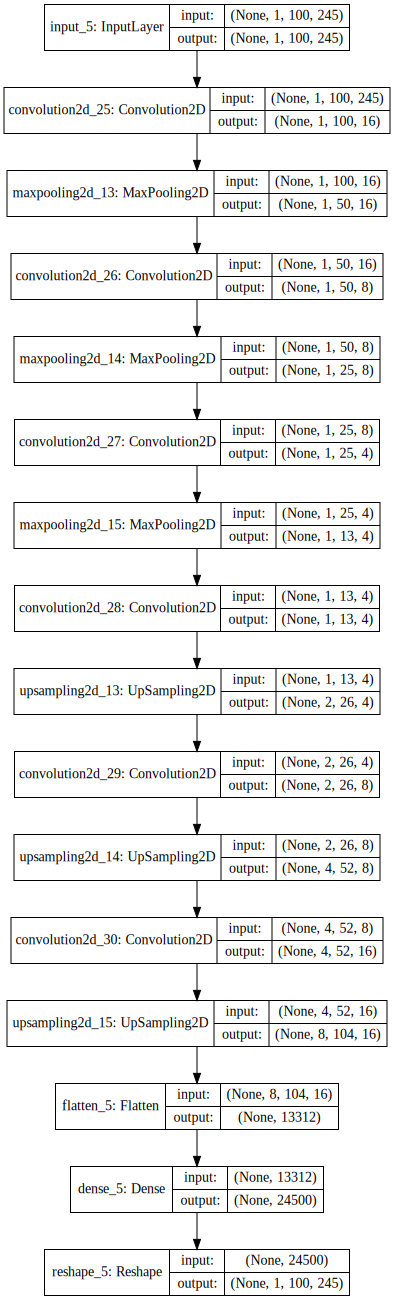

In [43]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot, plot
plot(model=autoencoder, show_layer_names=True, show_shapes=True, to_file="./data/model/model.png")
SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

In [44]:
num_train_images = x_train.shape[0]
num_test_images = x_test.shape[0]
x_train = x_train.reshape((num_train_images, 1, img_height, img_width))
x_test = x_test.reshape((num_test_images, 1, img_height, img_width))
print x_train.shape, x_test.shape

(4703, 1, 100, 245) (1176, 1, 100, 245)


In [45]:
checkpointer = ModelCheckpoint(filepath="./data/model/weights.hdf5", verbose=1, save_best_only=True)
history = LossHistory()
early_stopping = EarlyStopping(patience=20)

In [48]:
fit = autoencoder.fit(x_train, x_train, 
                      verbose=1,
                      nb_epoch=80,
                      batch_size=128,
                      shuffle=True,
                      validation_data=(x_test, x_test),
                      callbacks=[checkpointer, history, early_stopping])

Train on 4703 samples, validate on 1176 samples
Epoch 1/80
4703/4703 [==============================] - 302s - loss: -3816.3249 - val_loss: -3818.4483
Epoch 2/80
4703/4703 [==============================] - 258s - loss: -3816.3248 - val_loss: -3818.4483
Epoch 3/80
4703/4703 [==============================] - 256s - loss: -3816.3249 - val_loss: -3818.4483
Epoch 4/80
4703/4703 [==============================] - 254s - loss: -3816.3249 - val_loss: -3818.4483
Epoch 5/80
4703/4703 [==============================] - 254s - loss: -3816.3248 - val_loss: -3818.4483
Epoch 6/80
4703/4703 [==============================] - 254s - loss: -3816.3249 - val_loss: -3818.4483
Epoch 7/80
4703/4703 [==============================] - 255s - loss: -3816.3249 - val_loss: -3818.4483
Epoch 8/80
4703/4703 [==============================] - 254s - loss: -3816.3249 - val_loss: -3818.4483
Epoch 9/80
4703/4703 [==============================] - 254s - loss: -3816.3249 - val_loss: -3818.4483
Epoch 10/80
4703/4703 [==

In [50]:
fit.history

{'loss': [-3816.3248538374773,
  -3816.3248302695752,
  -3816.3248649984885,
  -3816.3248611570243,
  -3816.3248476080757,
  -3816.324861208936,
  -3816.3248662443684,
  -3816.3248519167455,
  -3816.3248584057051,
  -3816.3248577308532,
  -3816.3248374333871,
  -3816.3248376410338,
  -3816.3248378486805,
  -3816.3248567445312,
  -3816.3248610532009,
  -3816.3248391983839,
  -3816.3248579384999,
  -3816.324866971132,
  -3816.3248568483546,
  -3816.3248543565942,
  -3816.324846985136,
  -3816.3248611051126],
 'val_loss': [-3818.4482886904761,
  -3818.4482886904761,
  -3818.4482886904761,
  -3818.4482886904761,
  -3818.4482886904761,
  -3818.4482886904761,
  -3818.4482886904761,
  -3818.4482886904761,
  -3818.4482886904761,
  -3818.4482886904761,
  -3818.4482886904761,
  -3818.4482886904761,
  -3818.4482886904761,
  -3818.4482886904761,
  -3818.4482886904761,
  -3818.4482886904761,
  -3818.4482886904761,
  -3818.4482886904761,
  -3818.4482886904761,
  -3818.4482886904761,
  -3818.44828869

In [51]:
fit.params

{'batch_size': 128,
 'do_validation': True,
 'metrics': ['loss', 'val_loss'],
 'nb_epoch': 80,
 'nb_sample': 4703,
 'verbose': 1}

The model has fit poorly because an autoencoder requires that sufficient data per category is available for training, but in our case, we have only 1 signature per person; and also there is a lot of variation among the signatures.

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
decoded_imgs = autoencoder.predict(x_test)

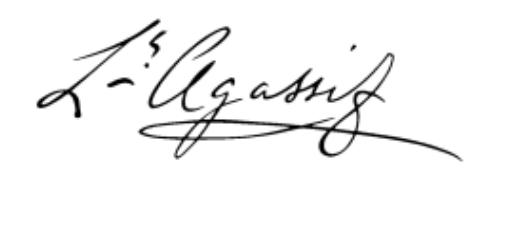

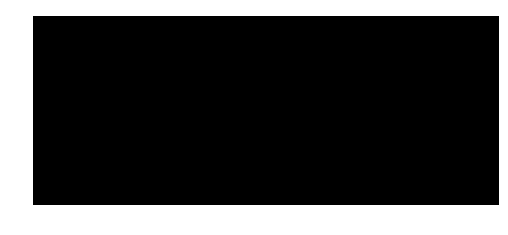

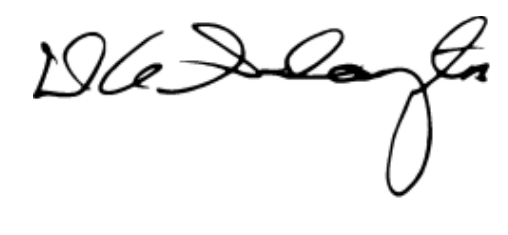

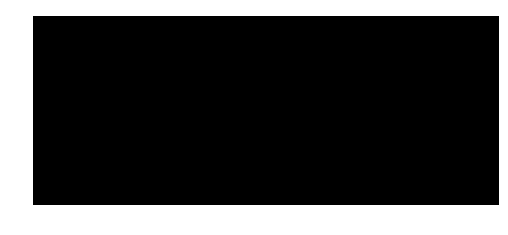

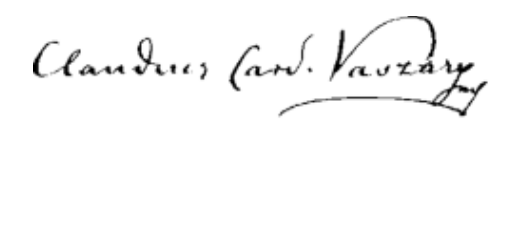

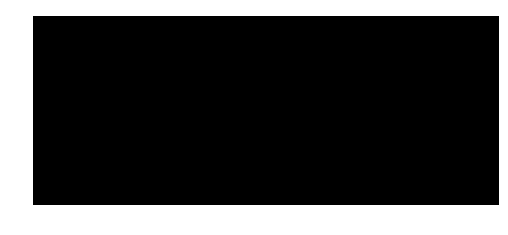

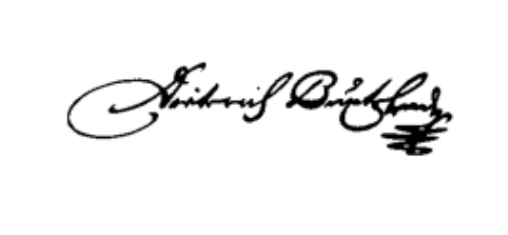

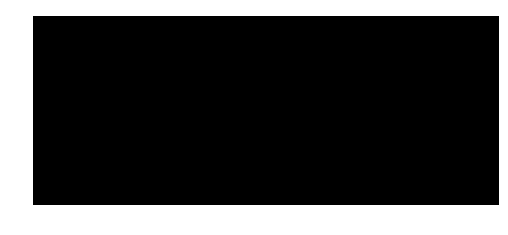

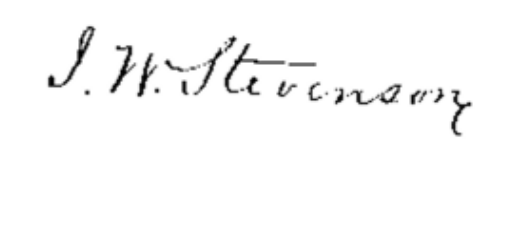

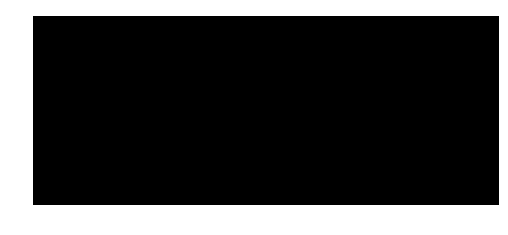

In [72]:
for i in xrange(5):
    img1 = x_test[i].reshape((img_height, img_width))
    plt.imshow(img1, cmap="gray")
    plt.axis('off')
    plt.show()

    img2 = decoded_imgs[i].reshape((img_height, img_width))
    plt.imshow(img2, cmap="gray")
    plt.axis('off')
    plt.show()

This shows that the autoencoder is not able to learn anything in our case. In our finding, it's a bad idea to use deep convolutional autoencoders with signatures when only 1 signature per person is available in the whole dataset. There is no point in visualizing the encoded features when the decoded images are all black.